# Lab Segmentation 2

In [4]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

64
0.4059244791666667


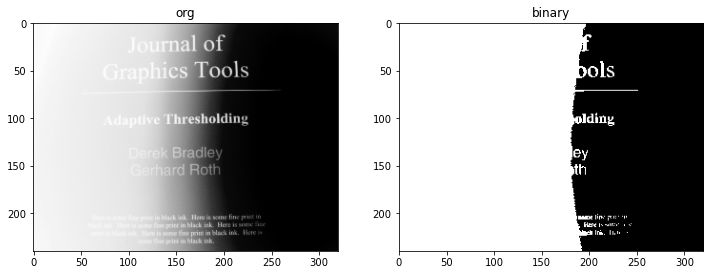

78
0.0009963371455534848


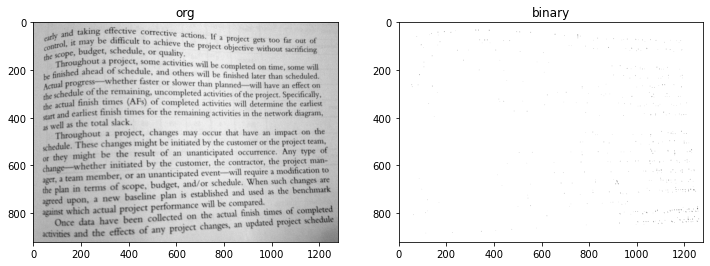

82
0.16588044860677534


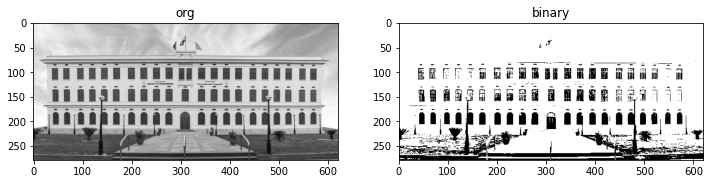

68
0.027313232421875


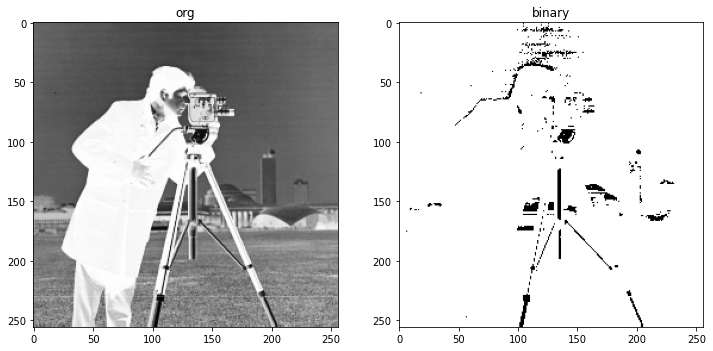

In [89]:

def getHistOfImage(image,nbins =256):
    hist = np.zeros(nbins)
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]):
            hist[image[i,j]] += 1
    return hist

def getThreshold(img, st_range, end_range):
          #convert to gray 
    g_u8 = np.array(img)
    hist = getHistOfImage(g_u8)     #get histogram
    thr = 0; 
    im_size = g_u8.shape[0] * g_u8.shape[1] # size of image
    for i in range(st_range,end_range):
        thr += (i* hist[i] / im_size)      #avg threshold
    return int(round(thr))              # round threshold
    
        
def exe(path):
    image = io.imread(path)
    gray = rgb2gray(image)    
    g_u8 = gray * 255               # convert to uint8
    g_u8 = g_u8.astype('uint8')     #
    n_thr = getThreshold(g_u8,0,256) # Tint
    p_thr = -1                  # next threshold
    while n_thr != p_thr:
        L_thr = getThreshold(g_u8, 0,n_thr)
        H_thr = getThreshold(g_u8,n_thr,256)
        p_thr = n_thr
        n_thr = (L_thr + H_thr)//2
    print(n_thr)
    bin_img = np.where(g_u8 > n_thr,1,0)
    print(g_u8[g_u8 <= n_thr].size/g_u8.size)
    show_images([g_u8, bin_img],['org','binary'])
    
exe('book.png')
exe('book1.png')
exe('cufe.png')
exe('cameraman.png')



